In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import openpyxl
import matplotlib.pyplot as plt
import statistics as st
import numpy as np

In [3]:
path = 'data.xlsx'
wb_obj = openpyxl.load_workbook(path, data_only = True)
df = wb_obj['Состояние системы']
x1,x2,x3,x4,x5,x6,x7,x8,x9 = (df['A18':'A21'],df['C18':'C26'],df['E18':'E23'],df['G18':'G28'],df['I18':'I24'],df['K18':'K23'],df['M18':'M25'],df['O18':'O25'],df['Q18':'Q212'])
#x, y, z = df.R.values, df.RL.values, df['h'].values*180/3.1415
y1,y2,y3,y4,y5,y6,y7,y8,y9 = (df['B18':'B21'],df['D18':'D26'],df['F18':'F23'],df['H18':'H28'],df['J18':'J24'],df['L18':'L23'],df['N18':'N25'],df['P18':'P25'],df['R18':'R212'])
x_array = np.asarray([x1,x2,x3,x4,x5,x6,x7,x8,x9], dtype = 'object')
y_array = np.asarray([y1,y2,y3,y4,y5,y6,y7,y8,y9], dtype = 'object')
x_scatter =[]
y_scatter = []
for i in range(len(x_array)):
    x_scat = []
    y_scat = []
    for j in range(len(x_array[i])):
        x_scat.append((df.cell(row = 18+j, column = 2*i+1)).value)
        y_scat.append((df.cell(row = 18+j, column = 2*i+2)).value)
    x_scatter.append(np.array(x_scat))
    y_scatter.append(np.array(y_scat))

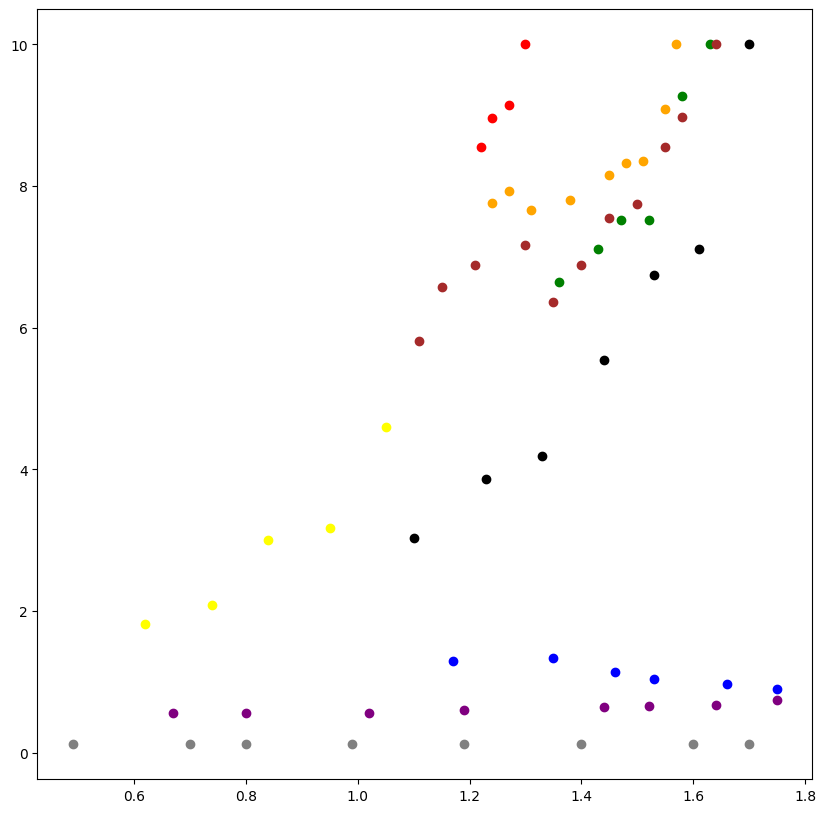

In [6]:
plt.figure(figsize=(10, 10))

colors = ['red', 'orange', 'green', 'brown', 'black', 'blue', 'purple', 'grey', 'yellow']
for i in range(len(x_scatter)):
        plt.scatter(x_scatter[i], y_scatter[i], color = colors[i])

plt.show()

In [55]:
%matplotlib notebook

grid_x, grid_y = np.mgrid[3.13:3.55:20j, 0:2.19:20j]
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# Создание графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Построение поверхности
ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis')
ax.scatter(x, y, z, c='black')

ax.set_xlabel('R')
ax.set_ylabel('RL')
ax.set_zlabel('Ux')

NameError: name 'x' is not defined